In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import ta

In [8]:
# Import the data
df = yf.download("AAPL", period="120mo")[["Open", "High", "Low", "Adj Close", "Volume"]]

df.columns = ["open", "high", "low", "close", "volume"]
df

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
Date,,,,,
2014-03-06,19.028214,19.087143,18.860714,16.696159,185488800
2014-03-07,18.967501,18.999287,18.787500,16.686420,220729600
2014-03-10,18.870001,19.047501,18.869286,16.701513,178584000
2014-03-11,19.123215,19.240713,19.021070,16.864147,279224400
2014-03-12,19.089643,19.191071,19.000000,16.880501,199326400
...,...,...,...,...,...
2024-02-29,181.270004,182.570007,179.529999,180.750000,136682600
2024-03-01,179.550003,180.529999,177.380005,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,81510100


In [9]:
def feature_engineering(df):
  """ Create new variables"""
  
  # We copy the dataframe to avoid interferences in the data
  df_copy = df.dropna().copy()
  
  # Create the returns
  df_copy["returns"] = df_copy["close"].pct_change(1)

  # Create the SMAs
  df_indicators = ta.add_all_ta_features(
  df, open="open", high="high", low="low", close="close", volume="volume", fillna=True).shift(1)
  
  dfc = pd.concat((df_indicators, df_copy), axis=1)

  return dfc.dropna()

In [10]:
dfc = feature_engineering(df)
dfc 

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_kama,others_dr,others_dlr,others_cr,open,high,low,close,volume,returns
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-07,19.028214,19.087143,18.860714,16.696159,185488800.0,-3.731860e+09,1.854888e+08,-20.119059,0.000000e+00,0.000000,...,16.696159,0.000000,0.000000,0.000000,18.967501,18.999287,18.787500,16.686420,220729600,-0.000583
2014-03-10,18.967501,18.999287,18.787500,16.686420,220729600.0,-8.332199e+09,-3.524080e+07,-20.511623,-2.149668e+06,-0.007727,...,16.691150,-0.058330,-0.058347,-0.058330,18.870001,19.047501,18.869286,16.701513,178584000,0.000904
2014-03-11,18.870001,19.047501,18.869286,16.701513,178584000.0,-1.285530e+10,1.433432e+08,-21.982303,-1.457524e+06,0.006487,...,16.696399,0.090450,0.090409,0.032067,19.123215,19.240713,19.021070,16.864147,279224400,0.009738
2014-03-12,19.123215,19.240713,19.021070,16.864147,279224400.0,-1.861858e+10,4.225676e+08,-21.548612,5.238030e+06,0.013569,...,16.782429,0.973767,0.969057,1.006147,19.089643,19.191071,19.000000,16.880501,199326400,0.000970
2014-03-13,19.089643,19.191071,19.000000,16.880501,199326400.0,-2.324006e+10,6.218940e+08,-21.855450,4.955412e+06,-0.003389,...,16.832041,0.096973,0.096926,1.104095,19.194286,19.273571,18.898571,16.693026,257742800,-0.011106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,182.509995,183.119995,180.130005,181.419998,48953900.0,-2.438418e+12,8.503328e+09,0.043959,-1.506950e+07,-0.702380,...,184.530482,-0.662545,-0.664750,986.597188,181.270004,182.570007,179.529999,180.750000,136682600,-0.003693
2024-03-01,181.270004,182.570007,179.529999,180.750000,136682600.0,-2.438444e+12,8.366646e+09,0.071837,-2.599915e+07,-1.278872,...,184.320466,-0.369308,-0.369991,982.584300,179.550003,180.529999,177.380005,179.660004,73488000,-0.006030
2024-03-04,179.550003,180.529999,177.380005,179.660004,73488000.0,-2.438412e+12,8.293158e+09,0.055597,-3.372808e+07,-8.980025,...,183.998803,-0.603041,-0.604866,976.055875,176.149994,176.899994,173.789993,175.100006,81510100,-0.025381


In [11]:
# Percentage train set
split = int(0.80*len(dfc))

# Train set creation
X_train = dfc.iloc[:split,6:dfc.shape[1]-1]
y_train = dfc[["returns"]].iloc[:split]


# Test set creation
X_test = dfc.iloc[split:,6:dfc.shape[1]-1]
y_test = dfc[["returns"]].iloc[split:]

In [13]:
# STANDARDISATION
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

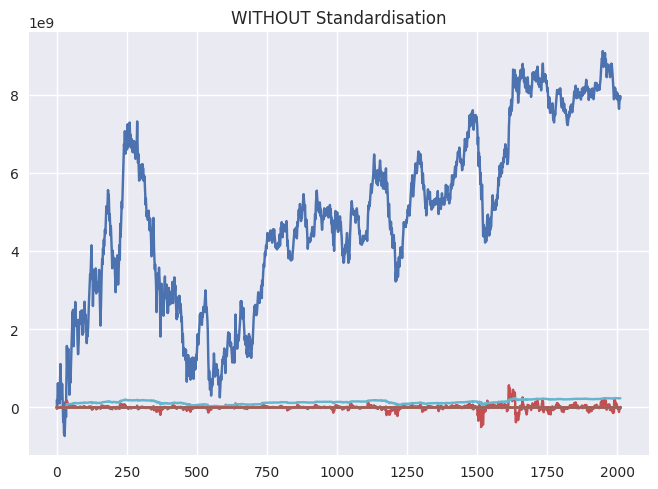

In [14]:
plt.plot(X_train.values[:,0:15])
plt.title("WITHOUT Standardisation")
plt.show()

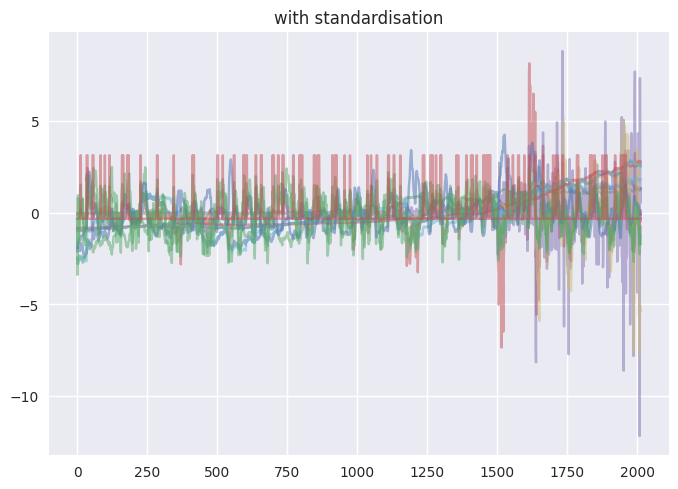

In [15]:
plt.plot(X_train_sc[:,0:15], alpha=0.5)
plt.title("with standardisation")
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [17]:
print(f"Without PCA: {np.shape(X_train)} \nWith PCA: {np.shape(X_train_pca)}")

Without PCA: (2013, 90) 
With PCA: (2013, 6)


In [18]:
from sklearn.svm import SVR

reg = SVR()

reg.fit(X_train_pca, y_train)

/home/st205lover/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<AxesSubplot:xlabel='Date'>

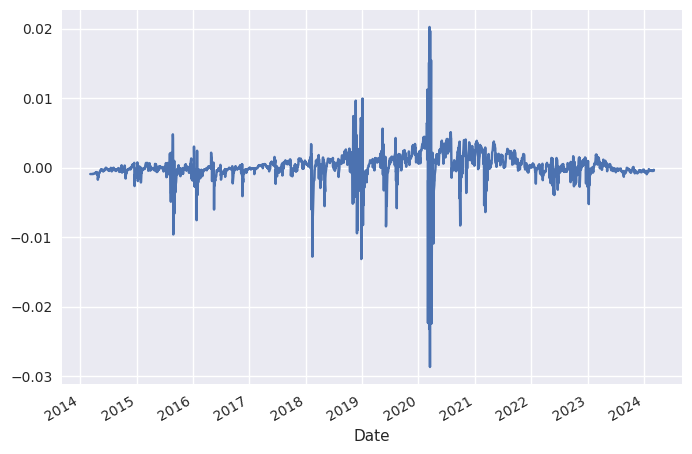

In [19]:
# Create predictions for the whole dataset
X = np.concatenate((X_train_pca, X_test_pca), axis=0)

dfc["prediction"] = reg.predict(X)

# We verify that the algorithm doesn't predict only way (positive or negative)
dfc["prediction"].plot()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
y_pred = reg.predict(X_test_pca)

# Calcul des métriques d'évaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.0028699212994809375
Mean Squared Error: 0.0003192303595941864
Mean Absolute Error: 0.013268950476305098


PASSON AU BACKTEST

In [26]:
def BackTest(serie, annualiazed_scalar=252):
  def drawdown_function(serie):

    # We compute Cumsum of the returns
    cum = serie.dropna().cumsum() + 1

    # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
    running_max = np.maximum.accumulate(cum)

    # We compute drawdown
    drawdown = cum/running_max - 1
    return drawdown

  # Import the benchmark
  sp500 = yf.download("^GSPC", period="120mo")["Adj Close"].pct_change(1)
  
  # Change the name
  sp500.name = "SP500"

  # Concat the returns and the sp500
  val = pd.concat((serie,sp500), axis=1).dropna()
  # Compute the drawdown
  drawdown = drawdown_function(serie)*100
  
  # Compute max drawdown
  max_drawdown = -np.min(drawdown)




  # Put a subplots
  fig, (cum, dra) = plt.subplots(1,2, figsize=(20,6))
  
  # Put a Suptitle
  fig.suptitle("Backtesting", size=20)

  # Returns cumsum chart
  cum.plot(serie.cumsum()*100, color="#39B3C7")

  # SP500 cumsum chart
  cum.plot(val["SP500"].cumsum()*100, color="#B85A0F")

  # Put a legend
  cum.legend(["Portfolio", "SP500"])
  
  # Set individual title
  cum.set_title("Cumulative Return", size=13)

  cum.set_ylabel("Cumulative Return %", size=11)

  # Put the drawdown
  dra.fill_between(drawdown.index,0,drawdown, color="#C73954", alpha=0.65)

  # Set individual title
  dra.set_title("Drawdown", size=13)

  dra.set_ylabel("drawdown in %", size=11)

  # Plot the graph
  plt.show()


  # Compute the sortino
  sortino = np.sqrt(annualiazed_scalar) * serie.mean()/serie.loc[serie<0].std()

  # Compute the beta
  beta = np.cov(val[["return", "SP500"]].values,rowvar=False)[0][1] / np.var(val["SP500"].values)

  # Compute the alpha
  alpha = annualiazed_scalar * (serie.mean() - beta*serie.mean())

  # Print the statistics
  print(f"Sortino: {np.round(sortino,3)}")
  print(f"Beta: {np.round(beta,3)}")
  print(f"Alpha: {np.round(alpha*100,3)} %")
  print(f"MaxDrawdown: {np.round(max_drawdown,3)} %")

[*********************100%%**********************]  1 of 1 completed


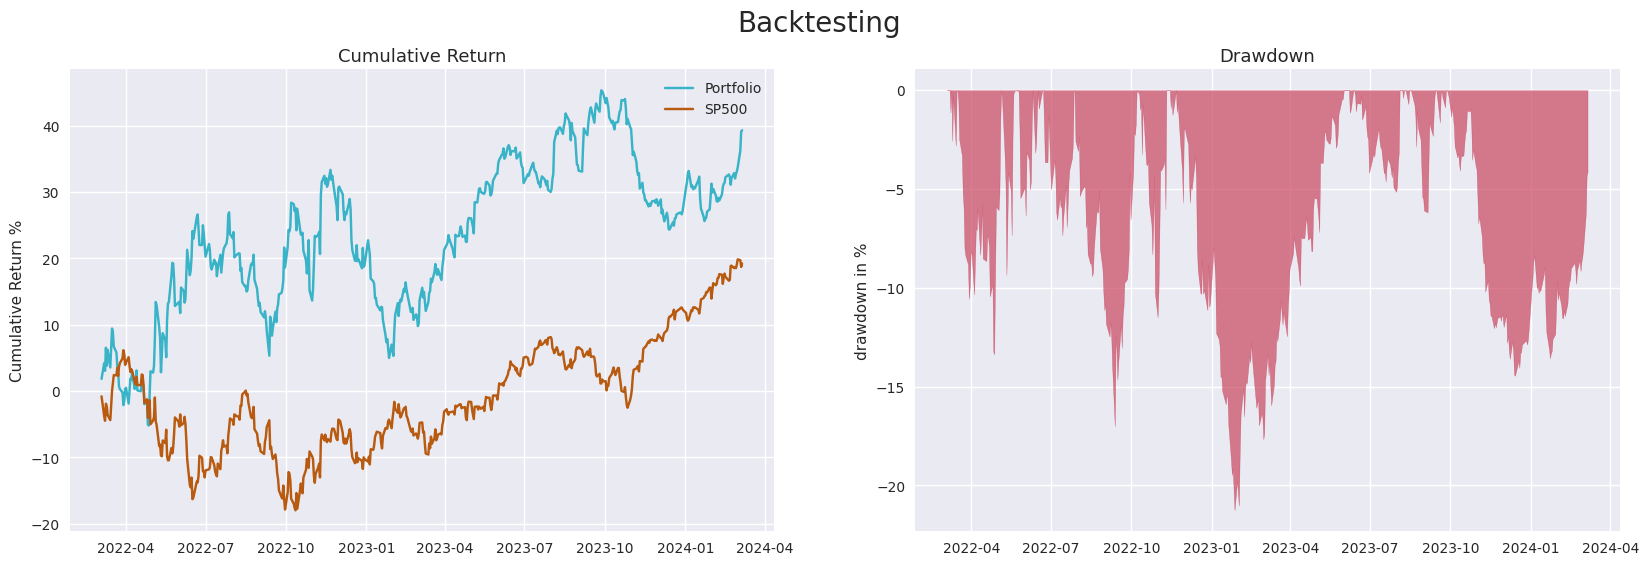

Sortino: 1.16
Beta: -0.133
Alpha: 22.258 %
MaxDrawdown: 21.255 %


In [27]:
# Compute the position
dfc["position"] = np.sign(dfc["prediction"])

# Compute the returns
dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)

dfc["return"] = dfc["strategy"]
BackTest(dfc["return"].iloc[split:])

In [28]:
def svm_reg_trading(symbol):

  def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.dropna().copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_indicators = ta.add_all_ta_features(
    df, open="open", high="high", low="low", close="close", volume="volume", fillna=True).shift(1)
    
    dfc = pd.concat((df_indicators, df_copy), axis=1)

    return dfc.dropna()
  

  # Import the data
  df = yf.download(symbol, period="120mo" )[["Open", "High", "Low", "Adj Close", "Volume"]]

  df.columns = ["open", "high", "low", "close", "volume"]

  dfc = feature_engineering(df)

  # Percentage train set
  split = int(0.80*len(dfc))

  # Train set creation
  X_train = dfc.iloc[:split,6:dfc.shape[1]-1]
  y_train = dfc[["returns"]].iloc[:split]


  # Test set creation
  X_test = dfc.iloc[split:,6:dfc.shape[1]-1]
  y_test = dfc[["returns"]].iloc[split:]


  # What you need to remind about this chapter
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()

  X_train_sc = sc.fit_transform(X_train)
  X_test_sc = sc.transform(X_test)


  from sklearn.decomposition import PCA
  pca = PCA(n_components=6)
  X_train_pca = pca.fit_transform(X_train_sc)
  X_test_pca = pca.transform(X_test_sc)

  # Import the class
  from sklearn.svm import SVR

  # Initialize the class
  reg = SVR()

  # Fit the model
  reg.fit(X_train_pca, y_train)

  # Create predictions for the whole dataset
  X = np.concatenate((X_train_pca, X_test_pca), axis=0)

  dfc["prediction"] = reg.predict(X)

  # Compute the position
  dfc["position"] = np.sign(dfc["prediction"])

  # Compute the returns
  dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)

  dfc["return"] = dfc["strategy"]
  BackTest(dfc["return"].iloc[split:])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


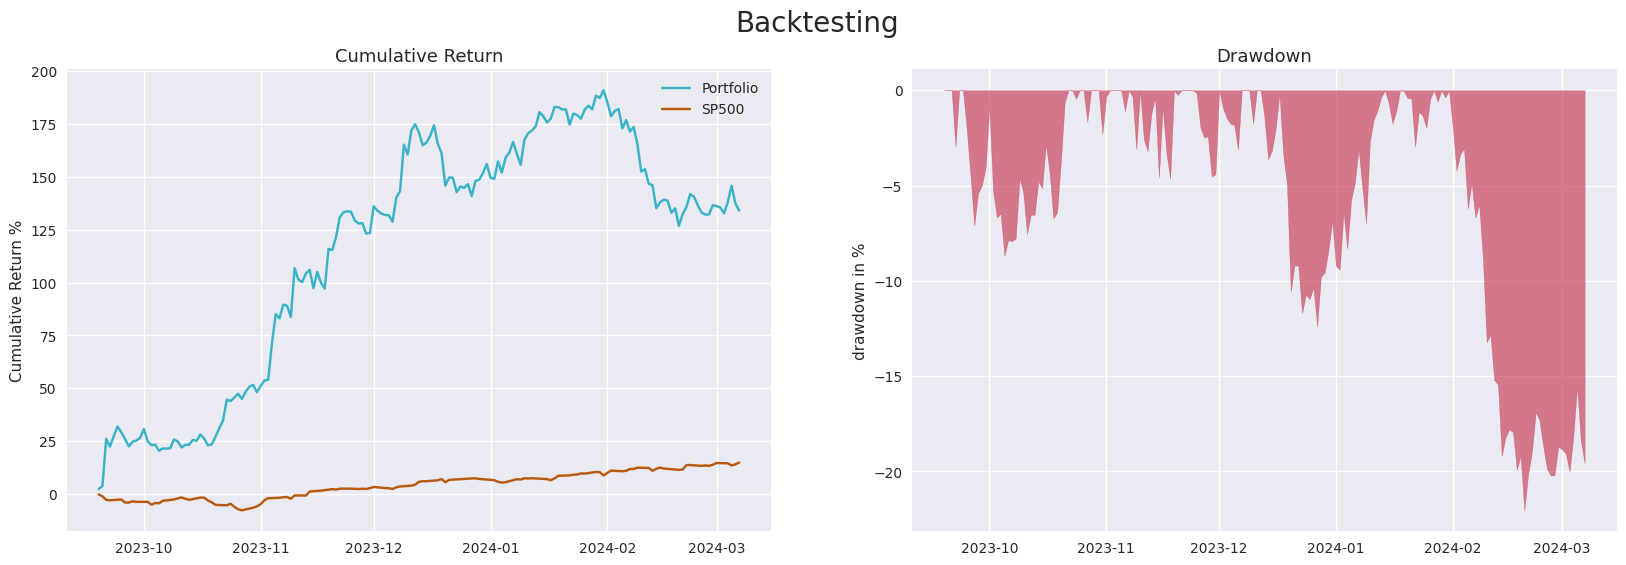

Sortino: 3.945
Beta: 0.385
Alpha: 121.491 %
MaxDrawdown: 22.037 %


In [38]:
svm_reg_trading("IMX10603-USD")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


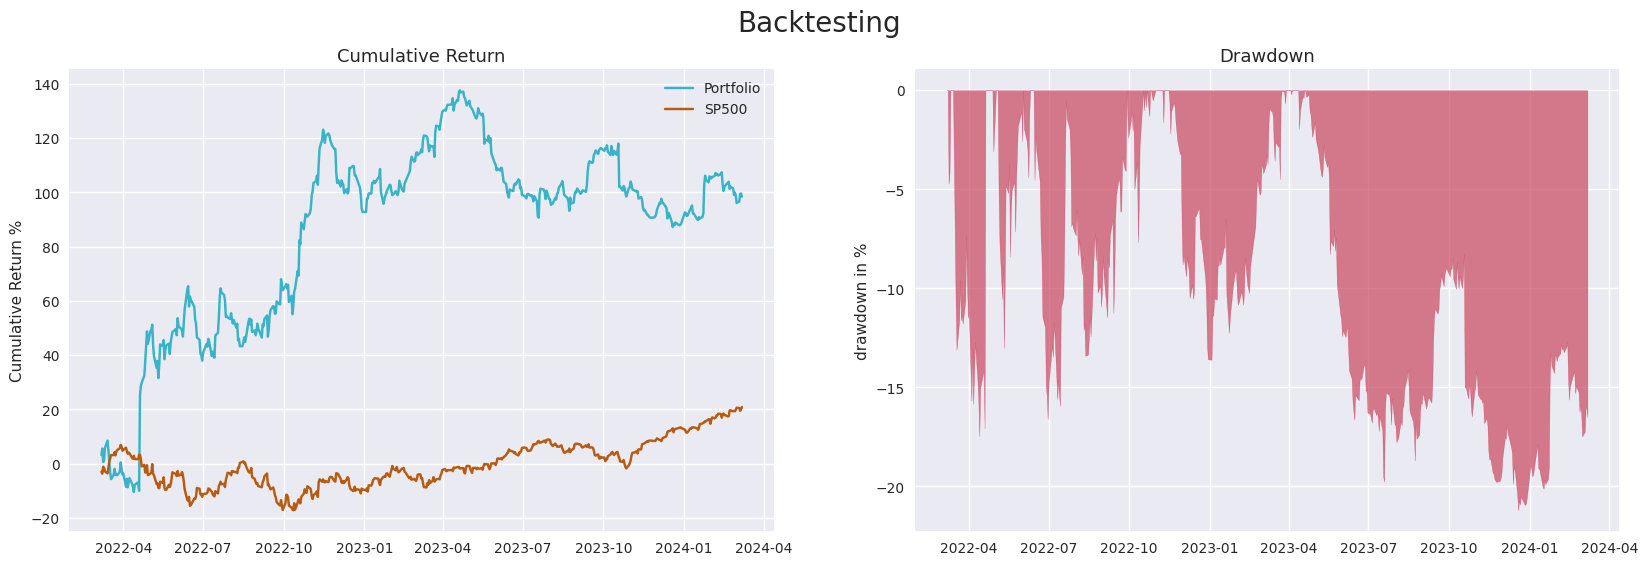

Sortino: 1.553
Beta: 0.059
Alpha: 46.334 %
MaxDrawdown: 21.21 %


In [39]:
svm_reg_trading("NFLX")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


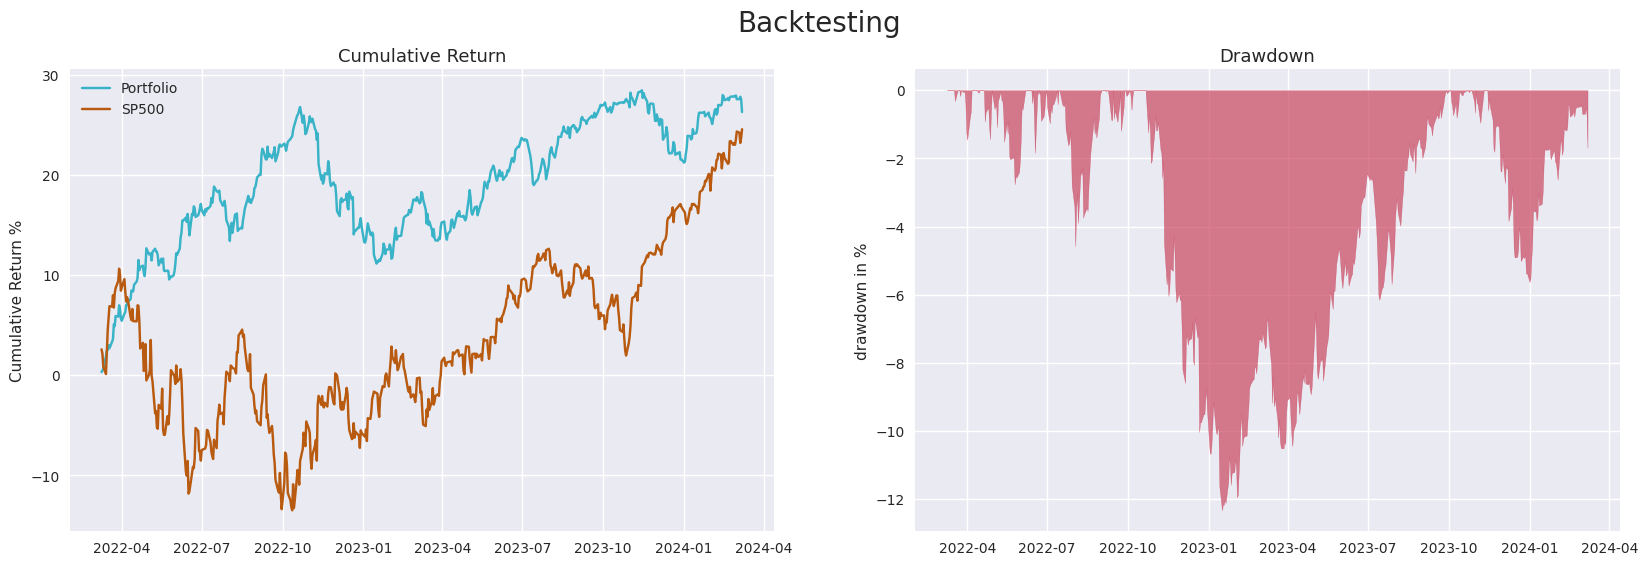

Sortino: 1.548
Beta: -0.026
Alpha: 13.004 %
MaxDrawdown: 12.33 %


In [43]:
svm_reg_trading('JPY=X')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


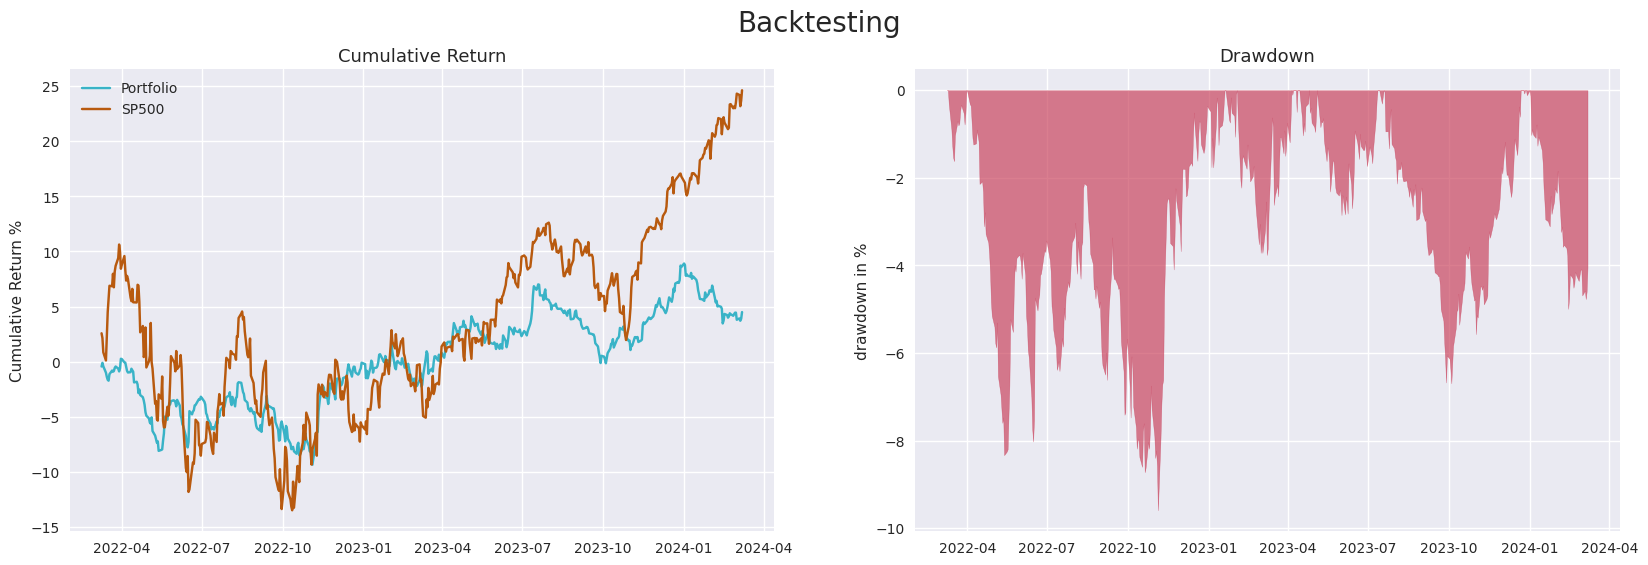

Sortino: 0.463
Beta: -0.028
Alpha: 2.231 %
MaxDrawdown: 9.591 %


In [46]:
svm_reg_trading('CHF=X')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


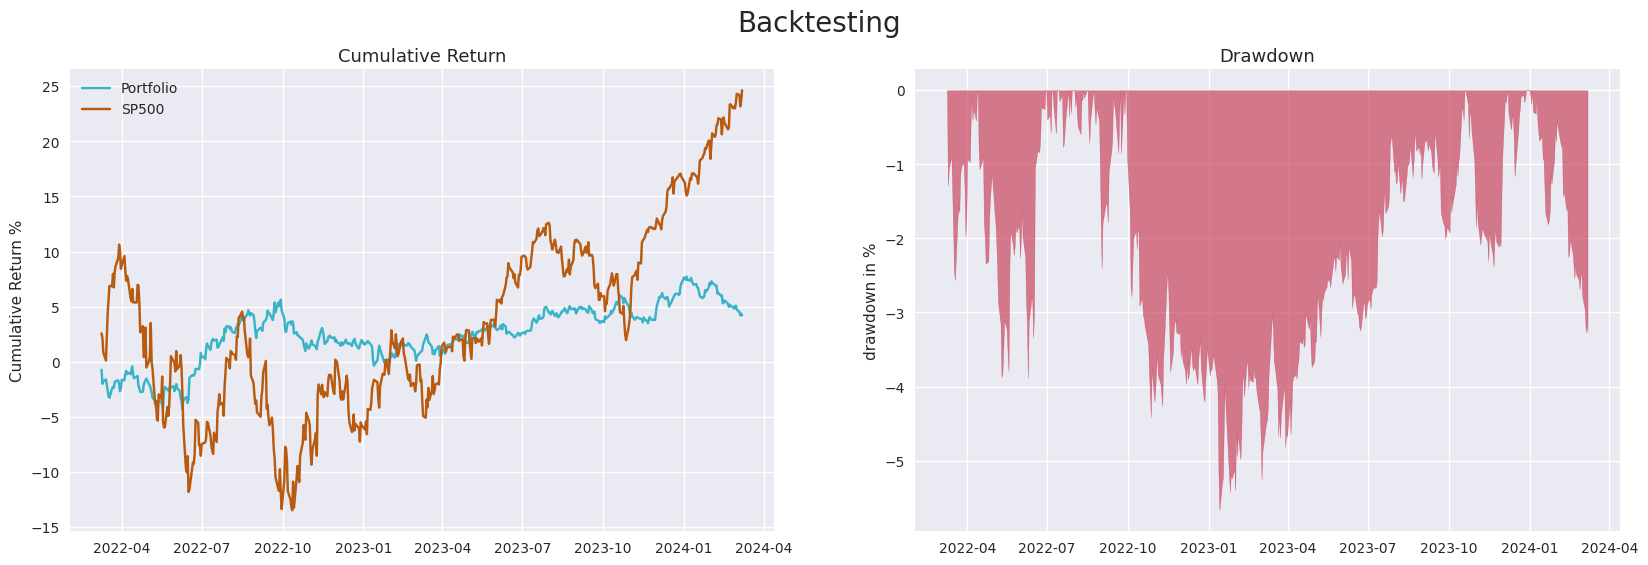

Sortino: 0.555
Beta: -0.023
Alpha: 2.077 %
MaxDrawdown: 5.67 %


In [47]:
svm_reg_trading('EURCHF=X')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


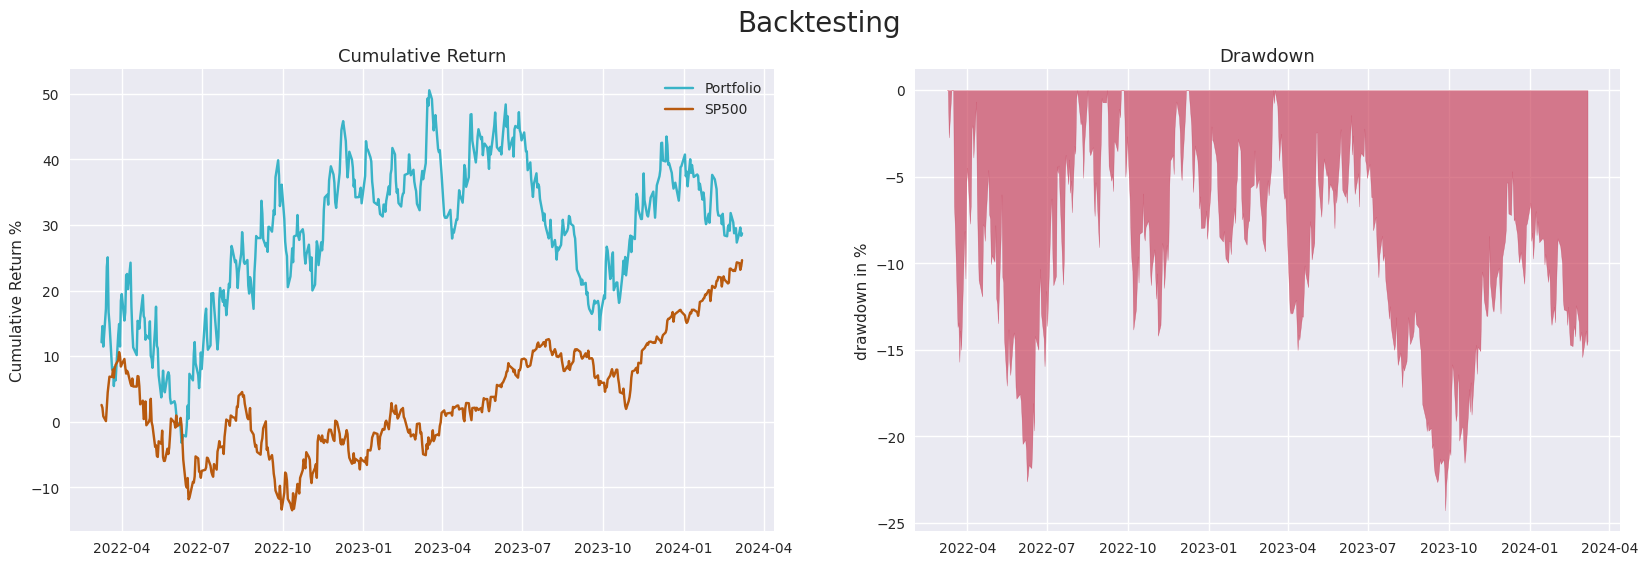

Sortino: 0.656
Beta: -0.254
Alpha: 18.01 %
MaxDrawdown: 24.277 %


In [48]:
svm_reg_trading('CL=F')